In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import researchpy as rp
import seaborn as sns

In [89]:
bank_df = pd.read_csv(r"C:\Users\Balakrishna_Vema\Documents\Data science\Data sets\bank_market3.csv")

In [90]:
bank_df.shape

(45221, 18)

In [91]:
bank_df.head()

,Cust_num,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [92]:
df = bank_df[["Cust_num","age","job","marital","education","default","balance","housing","loan", "duration"]]

In [93]:
df.shape

(45221, 10)

In [94]:
df.head()

,Cust_num,age,job,marital,education,default,balance,housing,loan,duration
0,1,58,management,married,tertiary,no,2143.0,yes,no,261
1,2,44,technician,single,secondary,no,29.0,yes,no,151
2,3,33,entrepreneur,married,secondary,no,2.0,yes,yes,76
3,4,47,blue-collar,married,unknown,no,1506.0,yes,no,92
4,5,33,unknown,single,unknown,no,1.0,no,no,198


In [95]:
#Dropping duplicate values for row level
print("drop duplicates")
df_dup = df.drop_duplicates()

drop duplicates


# MIssimg values treatment 
1.identify the missing values
2.treating the missing values 


In [96]:
df_dup.isnull().sum()

Cust_num      0
age           0
job           0
marital      65
education     0
default       0
balance      31
housing       0
loan          0
duration      0
dtype: int64

In [97]:
    df_dup["marital"].value_counts()

married     27177
single      12775
divorced     5199
Name: marital, dtype: int64

In [98]:
#treatment of missing values
df_dup["marital"] = np.where(df_dup["marital"].isnull() == True,"married" ,df_dup["marital"])

C:\Users\Balakrishna_Vema\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [99]:
#replaced with married in marrital status 
df_dup.isnull().sum()

Cust_num      0
age           0
job           0
marital       0
education     0
default       0
balance      31
housing       0
loan          0
duration      0
dtype: int64

In [100]:
#Verify the mean of balance
df_dup["balance"].mean()

1362.9813876286378

In [101]:
df_dup["balance"] = np.where(df_dup["balance"].isnull() == True,1362.981 ,df_dup["balance"])

C:\Users\Balakrishna_Vema\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
df_dup.isnull().sum()

Cust_num     0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
duration     0
dtype: int64

In [103]:
#Summary statistics
df =df_dup

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_num,45216.0,22603.501106,13052.877308,1.0,11299.75,22603.5,33907.25,45211.0
age,45216.0,40.936239,10.618695,18.0,33.00,39.0,48.00,95.0
balance,45216.0,1362.981387,3044.445530,-8019.0,72.00,450.0,1427.25,102127.0
duration,45216.0,258.153132,257.518526,0.0,103.00,180.0,319.00,4918.0


In [105]:
#Bank data containes 3 numerical variables remaining are binary and catagerical variables 
df.columns

Index(['Cust_num', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'duration'],
      dtype='object')

In [106]:
# IQR & idenfiy the cutoff values of data set 
iqr = df.quantile(0.75)-df.quantile(0.25)
lo = df.quantile(0.25)-1.5*iqr
uo =df.quantile(0.75)+1.5*iqr

print("IQR \n", iqr)
print("\n")
print("lower outlier cutoff value \n", lo)
print("\n")
print("upper outlier cutoff value \n", uo)

IQR 
 Cust_num    22607.50
age            15.00
balance      1355.25
duration      216.00
dtype: float64


lower outlier cutoff value 
 Cust_num   -22611.500
age            10.500
balance     -1960.875
duration     -221.000
dtype: float64


upper outlier cutoff value 
 Cust_num    67818.500
age            70.500
balance      3460.125
duration      643.000
dtype: float64


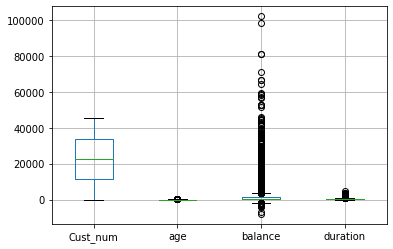

In [107]:
df.boxplot()

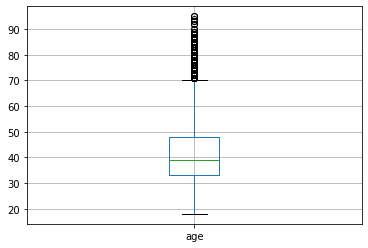

In [108]:
df.boxplot(["age"])

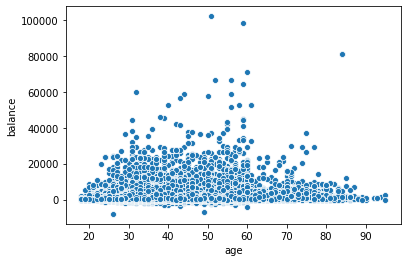

In [109]:
sns.scatterplot(x="age",y="balance",data=df)

Text(0.5, 1.0, 'comapre balance & age variable')

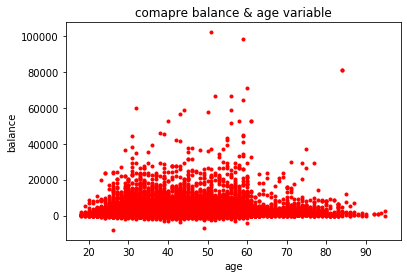

In [110]:
plt.plot(df["age"],df["balance"],'.r')
plt.xlabel("age")
plt.ylabel("balance")
plt.title("comapre balance & age variable")

In [111]:
#outliers handle the IQR , boxplot, qqplot, scaterplot

In [112]:
#NOrnal distrivution verification
skew_age = df["age"].skew()
skew_age

0.6847950864086354

In [113]:
skew_balamce = df["balance"].skew()
skew_balamce

8.361367535333146

In [114]:
#Age is in normal distribution because that is met the skew criteria(-1to1)
#Balance is not normally dirstibuted beacuse thst is not met the skew criteria(-1to1)

#check normall distribution, 1.skew, 2. histogram, 3.qqplot, 4.shapario

40.93623938428875
39.0
0.6847950864086354


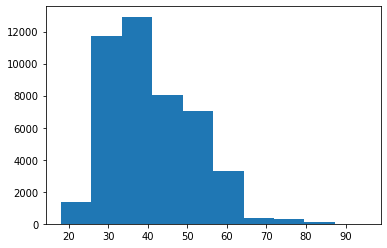

In [115]:
plt.hist(df["age"])
print(df["age"].mean())
print(df["age"].median())
print(df["age"].skew())

1362.9813873628805
450.0
8.361367535333146


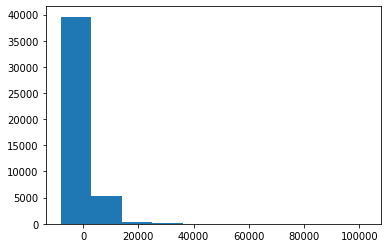

In [116]:
plt.hist(df["balance"])
print(df["balance"].mean())
print(df["balance"].median())
print(df["balance"].skew())

In [117]:
from scipy import stats

((array([-4.16851439, -3.96169375, -3.84889524, ...,  3.84889524,
          3.96169375,  4.16851439]),
  array([18, 18, 18, ..., 94, 95, 95], dtype=int64)),
 (10.408294960891935, 40.93623938428874, 0.9801077361786483))

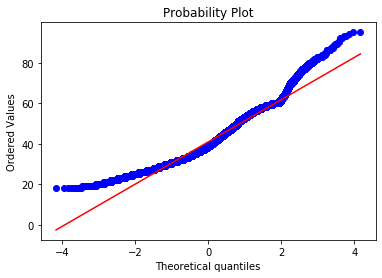

In [118]:
stats.probplot(df["age"],plot=plt)

((array([-4.16851439, -3.96169375, -3.84889524, ...,  3.84889524,
          3.96169375,  4.16851439]),
  array([ -8019.,  -6847.,  -4057., ...,  81204.,  98417., 102127.])),
 (2058.186175770785, 1362.9813873628798, 0.675992394807332))

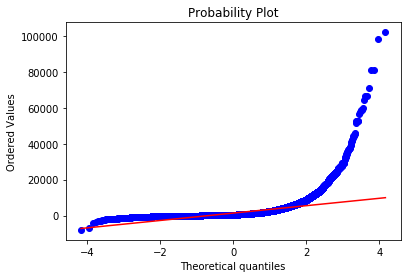

In [119]:
stats.probplot(df["balance"],plot=plt)

In [120]:
from scipy.stats import shapiro

In [121]:
stas , p=stats.shapiro(df["age"])

C:\Users\Balakrishna_Vema\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [122]:
stas

0.9605219960212708

In [123]:
p

0.0

In [124]:
df.shape

(45216, 10)

In [125]:
iqr_age = df["age"].quantile(0.75)-df["age"].quantile(0.25)
lo_age = df["age"].quantile(0.25)-1.5*iqr_age
uo_age = df["age"].quantile(0.75)+1.5*iqr_age
iqr_bal = df["balance"].quantile(0.75)-df["balance"].quantile(0.25)
lo_bal = df["balance"].quantile(0.25)-1.5*iqr_bal
uo_bal = df["balance"].quantile(0.75)+1.5*iqr_bal
print(lo_age)
print(uo_age)
print(lo_bal)
print(uo_bal)

10.5
70.5
-1960.875
3460.125


In [126]:
#Outlier treatment
df["age"] = np.where(df["age"] < lo_age,lo_age, df["age"])
df["age"]= np.where(df["age"]>uo_age, uo_age,df["age"])

In [127]:
df["balance"] = np.where(df["balance"]<lo_bal, lo_bal, df["balance"])
df["balance"] = np.where(df["balance"]>uo_bal, uo_bal, df["balance"])


{'whiskers': [<matplotlib.lines.Line2D at 0x1ca993ba208>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca98f58dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca98f6fd48>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca99018d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca990187c8>],
 'means': []}

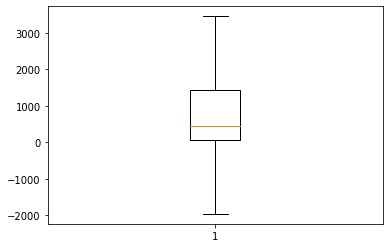

In [128]:
plt.boxplot(df["balance"])

In [129]:
print(df["balance"].skew())
print(df["age"].skew())

1.0959460844106537
0.5297055081598767


In [130]:
df["balance"].skew()

1.0959460844106537

In [131]:
#df["balance"] = np.sqrt(df["balance"])

In [132]:
df["balance"].skew()

1.0959460844106537

(array([   58.,   156.,  1083., 14831., 11617.,  5153.,  3151.,  1942.,
         1417.,  5808.]),
 array([-1960.875, -1418.775,  -876.675,  -334.575,   207.525,   749.625,
         1291.725,  1833.825,  2375.925,  2918.025,  3460.125]),
 <a list of 10 Patch objects>)

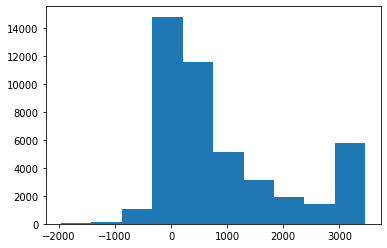

In [133]:
plt.hist(df["balance"])

((array([-4.16851439, -3.96169375, -3.84889524, ...,  3.84889524,
          3.96169375,  4.16851439]),
  array([-1960.875, -1960.875, -1960.875, ...,  3460.125,  3460.125,
          3460.125])),
 (1069.4382240783104, 934.2686004069351, 0.9091953406303127))

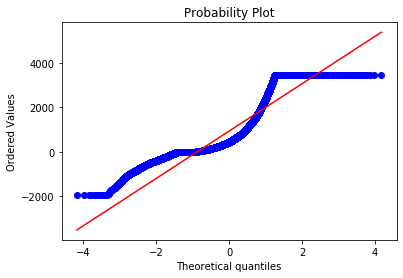

In [134]:
stats.probplot(df["balance"],plot=plt)

In [135]:
df["balance"].isna().sum()

0

In [136]:
df["balance"].min()

-1960.875

In [137]:
df["balance"].max()

3460.125

In [138]:
df

,Cust_num,age,job,marital,education,default,balance,housing,loan,duration
0,1,58.0,management,married,tertiary,no,2143.0,yes,no,261
1,2,44.0,technician,single,secondary,no,29.0,yes,no,151
2,3,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,76
3,4,47.0,blue-collar,married,unknown,no,1506.0,yes,no,92
4,5,33.0,unknown,single,unknown,no,1.0,no,no,198
...,...,...,...,...,...,...,...,...,...,...
45216,6,35.0,management,married,tertiary,no,231.0,yes,no,139
45217,7,28.0,management,single,tertiary,no,447.0,yes,yes,217
45218,8,42.0,entrepreneur,divorced,tertiary,yes,2.0,yes,no,380
45219,9,58.0,retired,married,primary,no,121.0,yes,no,50


In [139]:
df1 = pd.get_dummies(data=df, drop_first=True, dtype="int")

In [140]:
df1

,Cust_num,age,balance,duration,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
0,1,58.0,2143.0,261,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,2,44.0,29.0,151,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
2,3,33.0,2.0,76,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
3,4,47.0,1506.0,92,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,5,33.0,1.0,198,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,6,35.0,231.0,139,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
45217,7,28.0,447.0,217,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,1
45218,8,42.0,2.0,380,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
45219,9,58.0,121.0,50,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


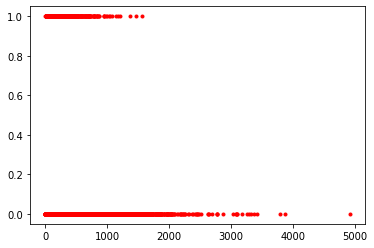

In [141]:
#To Compare two numerical varibules to use the scatter plot for visuvally 
plt.plot(df1["duration"],df1["default_yes"], "r.")

In [142]:
df1.corr()

,Cust_num,age,balance,duration,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
Cust_num,1.000000,0.006075,0.112477,0.013096,-0.120619,-0.022747,-0.013690,0.056034,0.086876,0.008688,...,0.029914,-0.005286,-0.072787,0.095118,-0.046363,0.107735,-0.007158,-0.053319,-0.176277,-0.084241
age,0.006075,1.000000,0.121953,-0.006644,-0.041576,0.023305,0.087955,-0.021147,0.431319,-0.007243,...,0.001548,0.050773,0.291072,-0.433011,-0.092555,-0.080980,0.068500,-0.017357,-0.182368,-0.013229
balance,0.112477,0.121953,1.000000,0.040614,-0.050225,-0.006261,0.002105,0.069966,0.064634,0.015165,...,0.012020,0.019008,0.034113,-0.013344,-0.080083,0.087055,0.018538,-0.123835,-0.080610,-0.119725
duration,0.013096,-0.006644,0.040614,1.000000,0.009657,-0.001261,-0.008039,-0.008336,0.025953,0.007390,...,0.020329,-0.006387,-0.022653,0.020409,0.002089,0.000909,-0.000674,-0.009931,0.005041,-0.012404
job_blue-collar,-0.120619,-0.041576,-0.050225,0.009657,1.000000,-0.096607,-0.087940,-0.269374,-0.120263,-0.099620,...,-0.090211,-0.041930,0.121792,-0.088280,0.040582,-0.320547,0.014727,0.010255,0.177413,0.018284
job_entrepreneur,-0.022747,0.023305,-0.006261,-0.001261,-0.096607,1.000000,-0.030976,-0.094884,-0.042361,-0.035090,...,-0.031776,-0.014769,0.044458,-0.050501,-0.054958,0.067789,0.009301,0.027143,0.010689,0.039736
job_housemaid,-0.013690,0.087955,0.002105,-0.008039,-0.087940,-0.030976,1.000000,-0.086372,-0.038561,-0.031942,...,-0.028925,-0.013444,0.045635,-0.062063,-0.065381,-0.057011,-0.004044,-0.000384,-0.079393,-0.017235
job_management,0.056034,-0.021147,0.069966,-0.008336,-0.269374,-0.094884,-0.086372,1.000000,-0.118119,-0.097844,...,-0.088603,-0.041182,-0.032389,0.032636,-0.406139,0.598922,-0.040144,-0.002746,-0.063327,-0.038803
job_retired,0.086876,0.431319,0.064634,0.025953,-0.120263,-0.042361,-0.038561,-0.118119,1.000000,-0.043683,...,-0.039557,-0.018386,0.076108,-0.119785,-0.036168,-0.066843,0.013272,-0.011330,-0.156525,-0.014904
job_self-employed,0.008688,-0.007243,0.015165,0.007390,-0.099620,-0.035090,-0.031942,-0.097844,-0.043683,1.000000,...,-0.032767,-0.015230,0.010259,-0.000032,-0.056226,0.097394,-0.015692,0.004076,-0.027336,-0.007884


In [144]:
np.corrcoef(df1)

array([[1.        , 0.24820761, 0.07995858, ..., 0.07591723, 0.88640322,
        0.99836725],
       [0.24820761, 1.        , 0.97710528, ..., 0.96932873, 0.54706834,
        0.23060429],
       [0.07995858, 0.97710528, 1.        , ..., 0.95355659, 0.44530627,
        0.06916747],
       ...,
       [0.07591723, 0.96932873, 0.95355659, ..., 1.        , 0.34418199,
        0.04934382],
       [0.88640322, 0.54706834, 0.44530627, ..., 0.34418199, 1.        ,
        0.89598458],
       [0.99836725, 0.23060429, 0.06916747, ..., 0.04934382, 0.89598458,
        1.        ]])